# MOCAT

> Orbital Capactiy and Assesment Tool. This is an initial draftsheet

In [20]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
mat = scipy.io.loadmat('../data/SommaMult_3_x10_x10_0215_1_part_1_density.mat')

In [3]:
# Print a summary of the data contained in the mat file
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'MCconfig', 'param', 'paramSSEM', 'time_density', 'ra_disc', 'rp_disc', 'inc_disc', 'Am_disc', 'comb_Am_rp', 'comb_Am_ra', 'comb_Am_inc', 'comb_inc_rp', 'comb_inc_ra', 'comb_ra_rp', '__function_workspace__'])


In [4]:
# Remove every key starting with '__' from the dictionary
mat = {k: v for k, v in mat.items() if not k.startswith('__')}
mat.keys()

dict_keys(['MCconfig', 'param', 'paramSSEM', 'time_density', 'ra_disc', 'rp_disc', 'inc_disc', 'Am_disc', 'comb_Am_rp', 'comb_Am_ra', 'comb_Am_inc', 'comb_inc_rp', 'comb_inc_ra', 'comb_ra_rp'])

In [5]:
# Print the type of data in each key. In case the data is a numpy array, 
# print the shape of the array
for k, v in mat.items():
    print(k, type(v), v.shape)

MCconfig <class 'numpy.ndarray'> (1, 1)
param <class 'numpy.ndarray'> (1, 1)
paramSSEM <class 'numpy.ndarray'> (1, 1)
time_density <class 'numpy.ndarray'> (122, 1)
ra_disc <class 'numpy.ndarray'> (1, 37)
rp_disc <class 'numpy.ndarray'> (1, 37)
inc_disc <class 'numpy.ndarray'> (1, 181)
Am_disc <class 'numpy.ndarray'> (1, 100)
comb_Am_rp <class 'numpy.ndarray'> (99, 36, 122)
comb_Am_ra <class 'numpy.ndarray'> (99, 36, 122)
comb_Am_inc <class 'numpy.ndarray'> (99, 180, 122)
comb_inc_rp <class 'numpy.ndarray'> (180, 36, 122)
comb_inc_ra <class 'numpy.ndarray'> (180, 36, 122)
comb_ra_rp <class 'numpy.ndarray'> (36, 36, 122)


* time_density: tiempo en segundos desde el inicio de la simulación (intervalos de un mes, esto lo podemos ajustar)
* ra_disc = discretización del apogeo, en km (edges), esto lo podemos ajustar
* rp_disc = discretización del perigeo, en km (edges), esto lo podemos ajustar
* inc_disc = discretización de la inclinación, en rad (edges), esto lo podemos ajustar
* Am_disc = discretización del area to mass ratio, en m^2/kg (edges), esto lo podemos ajustar
* comb_Am_rp =  Estos son los valores (**número de objetos**) para generar la "imagen" de A/m vs perigeo (filas con valores crecientes de A/m y columnas con valores crecientes de perigeo. La tercera dimensión es el tiempo)
* comb_Am_ra = Lo mismo pero para A/m vs apogeo
* comb_Am_inc = Lo mismo pero para A/m vs inclinación
* comb_inc_rp
* comb_inc_ra
* comb_ra_rp

Lo que te envío es solo una simulación de 10 años. Las simulaciones que tendremos serán de 100, 300 o 500 años, y unas 100 simulaciones en total para cada escenario (con la misma población inicial y launch profile). No sé cuántos escenarios tengamos en total, quizá unos 5

In [6]:
# Check if the distance between two points in the array 'time_density' is the same for all points
np.all(np.diff(mat['time_density'][:, 0]) == np.diff(mat['time_density'][:, 0])[0])

# Print the distances between two points in the array 'time_density'
np.diff(mat['time_density'][:, 0])

array([1728000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592

The distances are the same in every two points (1 month) except for the first data point

In [7]:
# Do the same (prit distances) with the array 'ra_disc'
np.diff(mat['ra_disc'])

array([[50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50., 50., 50., 50., 50., 50., 50., 50.]])

In [8]:
mat['comb_Am_rp'][0].shape

(36, 122)

0 1510 35.94478022483487 129.53544694935283


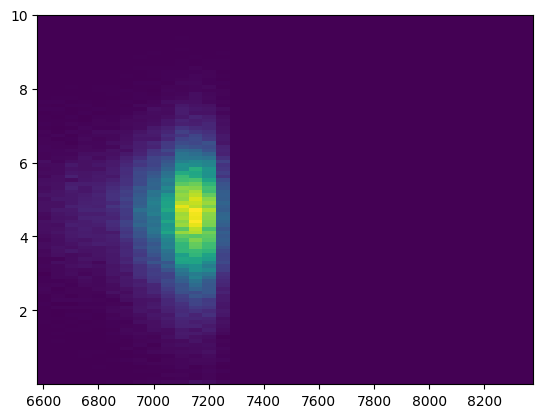

In [9]:
# Get some statistics about the matrix 'comb_Am_rp'
print(np.min(mat['comb_Am_rp']), np.max(mat['comb_Am_rp']), np.mean(mat['comb_Am_rp']), np.std(mat['comb_Am_rp']))

# Plot the first epoch of that sequence of matrices as a 2D distribution (time is in the last dimension)
# The labels of the x axis should be taken from the array 'rp_disc', whereas the 
# ones of the y axis should be taken from the array 'Am_disc'
plt.imshow(mat['comb_Am_rp'][:,:,0], extent=[np.min(mat['rp_disc']), 
                                             np.max(mat['rp_disc']), 
                                             np.min(mat['Am_disc']), 
                                             np.max(mat['Am_disc'])], aspect='auto')

In [10]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [11]:


mat = scipy.io.loadmat('../data/SommaMult_3_x10_x10_0215_1_part_1_density.mat')

In [12]:
# Print a summary of the data contained in the mat file
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'MCconfig', 'param', 'paramSSEM', 'time_density', 'ra_disc', 'rp_disc', 'inc_disc', 'Am_disc', 'comb_Am_rp', 'comb_Am_ra', 'comb_Am_inc', 'comb_inc_rp', 'comb_inc_ra', 'comb_ra_rp', '__function_workspace__'])


In [13]:
# Remove every key starting with '__' from the dictionary
mat = {k: v for k, v in mat.items() if not k.startswith('__')}
mat.keys()

dict_keys(['MCconfig', 'param', 'paramSSEM', 'time_density', 'ra_disc', 'rp_disc', 'inc_disc', 'Am_disc', 'comb_Am_rp', 'comb_Am_ra', 'comb_Am_inc', 'comb_inc_rp', 'comb_inc_ra', 'comb_ra_rp'])

In [14]:
# Print the type of data in each key. In case the data is a numpy array, 
# print the shape of the array
for k, v in mat.items():
    print(k, type(v), v.shape)

MCconfig <class 'numpy.ndarray'> (1, 1)
param <class 'numpy.ndarray'> (1, 1)
paramSSEM <class 'numpy.ndarray'> (1, 1)
time_density <class 'numpy.ndarray'> (122, 1)
ra_disc <class 'numpy.ndarray'> (1, 37)
rp_disc <class 'numpy.ndarray'> (1, 37)
inc_disc <class 'numpy.ndarray'> (1, 181)
Am_disc <class 'numpy.ndarray'> (1, 100)
comb_Am_rp <class 'numpy.ndarray'> (99, 36, 122)
comb_Am_ra <class 'numpy.ndarray'> (99, 36, 122)
comb_Am_inc <class 'numpy.ndarray'> (99, 180, 122)
comb_inc_rp <class 'numpy.ndarray'> (180, 36, 122)
comb_inc_ra <class 'numpy.ndarray'> (180, 36, 122)
comb_ra_rp <class 'numpy.ndarray'> (36, 36, 122)


* time_density: tiempo en segundos desde el inicio de la simulación (intervalos de un mes, esto lo podemos ajustar)
* ra_disc = discretización del apogeo, en km (edges), esto lo podemos ajustar
* rp_disc = discretización del perigeo, en km (edges), esto lo podemos ajustar
* inc_disc = discretización de la inclinación, en rad (edges), esto lo podemos ajustar
* Am_disc = discretización del area to mass ratio, en m^2/kg (edges), esto lo podemos ajustar
* comb_Am_rp =  Estos son los valores (**número de objetos**) para generar la "imagen" de A/m vs perigeo (filas con valores crecientes de A/m y columnas con valores crecientes de perigeo. La tercera dimensión es el tiempo)
* comb_Am_ra = Lo mismo pero para A/m vs apogeo
* comb_Am_inc = Lo mismo pero para A/m vs inclinación
* comb_inc_rp
* comb_inc_ra
* comb_ra_rp

Lo que te envío es solo una simulación de 10 años. Las simulaciones que tendremos serán de 100, 300 o 500 años, y unas 100 simulaciones en total para cada escenario (con la misma población inicial y launch profile). No sé cuántos escenarios tengamos en total, quizá unos 5

In [15]:
# Check if the distance between two points in the array 'time_density' is the same for all points
np.all(np.diff(mat['time_density'][:, 0]) == np.diff(mat['time_density'][:, 0])[0])

# Print the distances between two points in the array 'time_density'
np.diff(mat['time_density'][:, 0])

array([1728000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592000, 2592000, 2592000, 2592000, 2592000, 2592000,
       2592000, 2592

The distances are the same in every two points (1 month) except for the first data point

In [16]:
# Do the same (prit distances) with the array 'ra_disc'
np.diff(mat['ra_disc'])

array([[50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50., 50., 50., 50., 50., 50., 50., 50.]])

In [17]:
mat['comb_Am_rp'][0].shape

(36, 122)

0 1510 35.94478022483487 129.53544694935283


Text(0, 0.5, 'Am [m2/kg]')

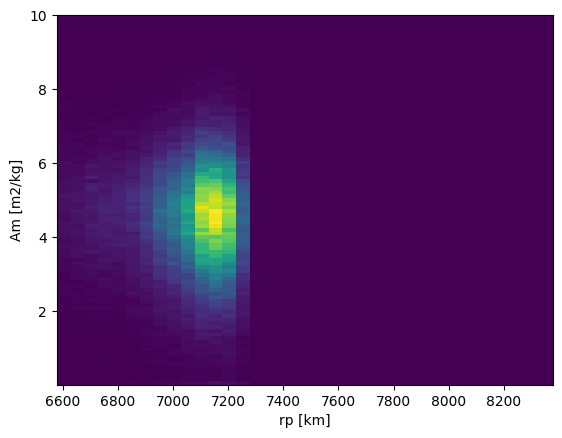

In [18]:
# Get some statistics about the matrix 'comb_Am_rp'
print(np.min(mat['comb_Am_rp']), np.max(mat['comb_Am_rp']), np.mean(mat['comb_Am_rp']), np.std(mat['comb_Am_rp']))

# Plot the first epoch of that sequence of matrices as a 2D distribution (time is in the last dimension)
# The labels of the x axis should be taken from the array 'rp_disc', whereas the 
# ones of the y axis should be taken from the array 'Am_disc'
# The titles of the axis should be 'rp' and 'Am', respectively
plt.imshow(mat['comb_Am_rp'][:,:,0], extent=[np.min(mat['rp_disc']),
                                                np.max(mat['rp_disc']),
                                                np.min(mat['Am_disc']),
                                                np.max(mat['Am_disc'])], aspect='auto')
plt.xlabel('rp [km]')
plt.ylabel('Am [m2/kg]')

MovieWriter imagemagick unavailable; using Pillow instead.


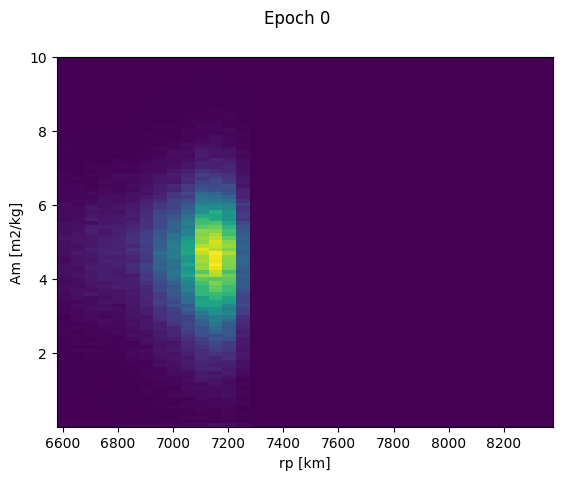

In [23]:
# Slow cell
from IPython.display import HTML

fig = plt.figure()
ax = fig.add_subplot(111)
# Plot matrix at t=0
im = ax.imshow(mat['comb_Am_rp'][:,:,0], extent=[np.min(mat['rp_disc']),
                                                    np.max(mat['rp_disc']),
                                                    np.min(mat['Am_disc']),
                                                    np.max(mat['Am_disc'])], aspect='auto')

plt.xlabel('rp [km]')
plt.ylabel('Am [m2/kg]')

# Define a function that updates the data of the plot
# Change the title of the plot to show the time of the epoch
def animate(i, im, fig):
    fig.suptitle(f'Epoch {i}')
    im.set_array(mat['comb_Am_rp'][:, :, i])  # Update data
    return im,

ani = animation.FuncAnimation(fig, 
                        animate, 
                        frames=mat['comb_Am_rp'].shape[-1], 
                        fargs=(im, fig))

# Save the animation as a gif file
ani.save('../plots/Am_rp.gif', writer='imagemagick', fps=10)